<a href="https://colab.research.google.com/github/JaswanthReddy15/Jaswanth_Reddy_INBT03921_AUG_2023/blob/main/iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

# Analysing the data


#1. Loading Data

In [ ]:
iris=load_iris
iris=pd.read_csv("/content/irisdataset.csv")
print(iris)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


# 2. Displaying Data

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#3 . Null Values and Samples of each class

In [ ]:
#to display no.of samples of each class
iris['species'].value_counts()
[ ]
#null values
iris.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 4.displaying top data

In [ ]:
iris=pd.read_csv('/content/irisdataset.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Iris data Visvualisation

#1.Scatter Plot

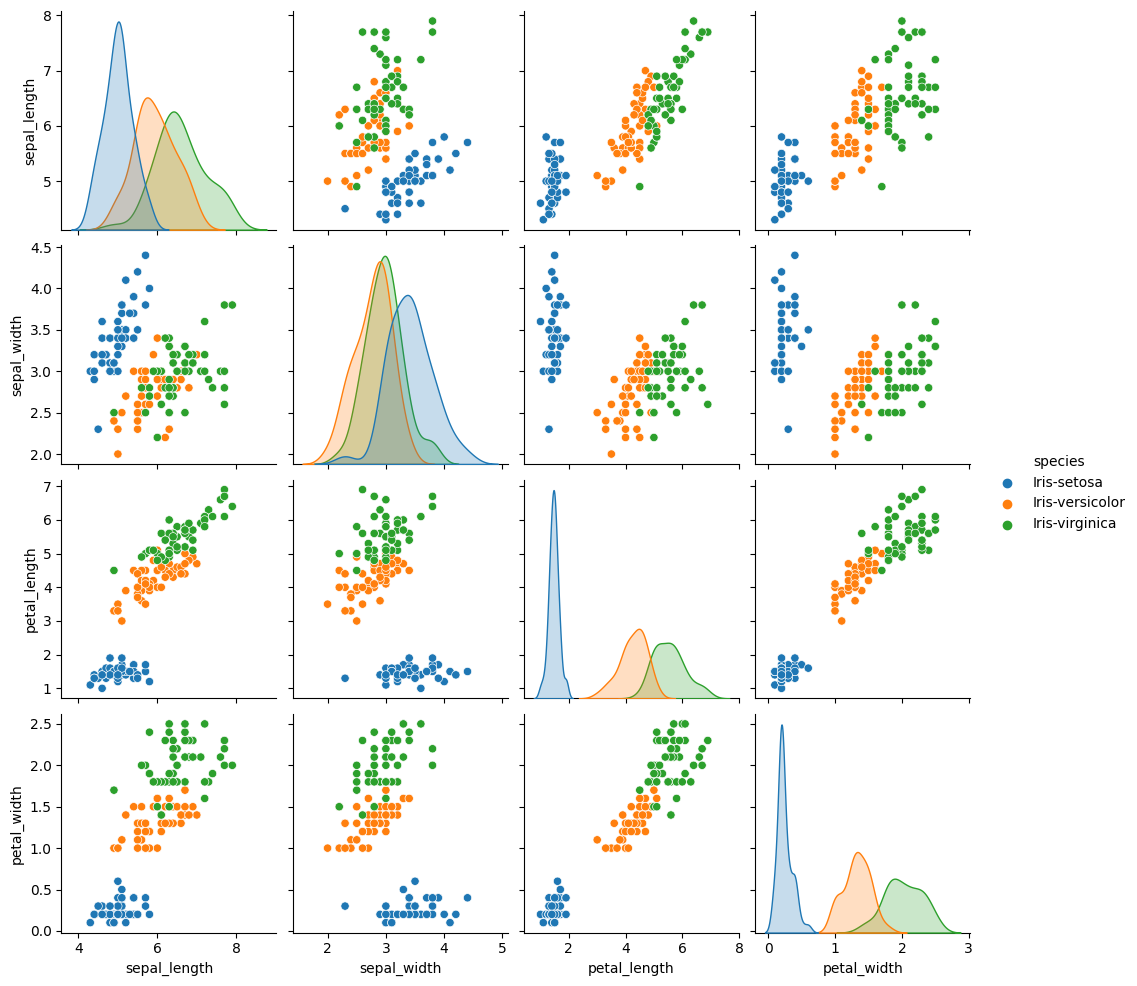

In [ ]:
sns.pairplot(iris,hue="species");



sepal_length,sepal_width

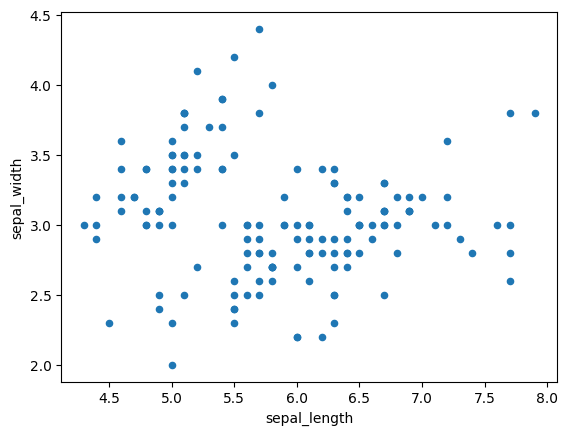

In [ ]:
iris.plot(kind='scatter',x="sepal_length",y="sepal_width")
plt.show()

petal_length,petal_width

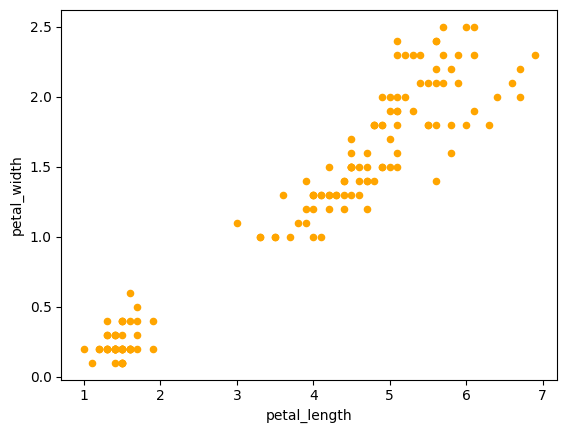

In [ ]:
iris.plot(kind='scatter',x="petal_length",y="petal_width", color='orange')

plt.show()

<Axes: xlabel='species', ylabel='sepal_width'>

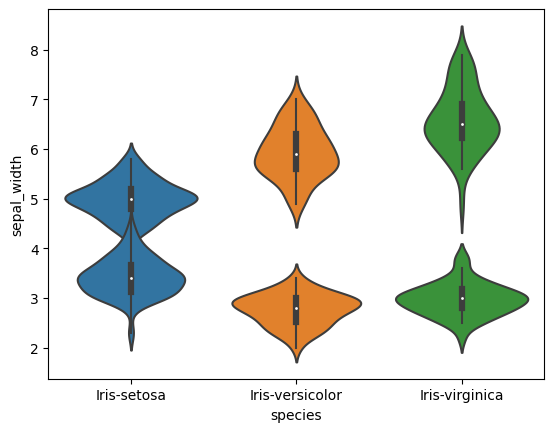

In [ ]:


sns.violinplot(x='species' ,y='sepal_length',data=iris)
sns.violinplot(x='species', y='sepal_width', data=iris)

<Axes: xlabel='species', ylabel='petal_width'>

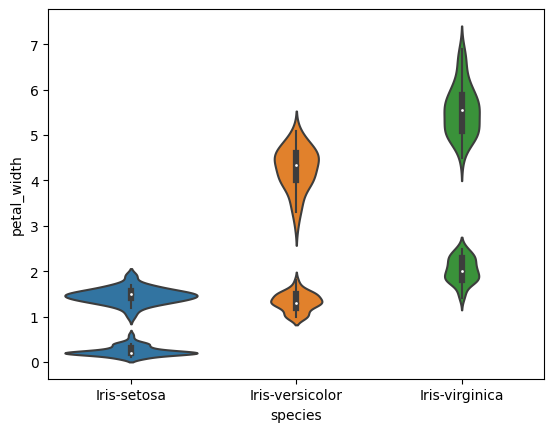

In [ ]:
sns.violinplot(x='species' ,y='petal_length',data=iris)
sns.violinplot(x='species', y='petal_width', data=iris)

# 2.Coorelation Matrix

In [ ]:
iris.corr()

<ipython-input-12-156dd03bc859>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-13-641f81bbf656>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot=True)


<Axes: >

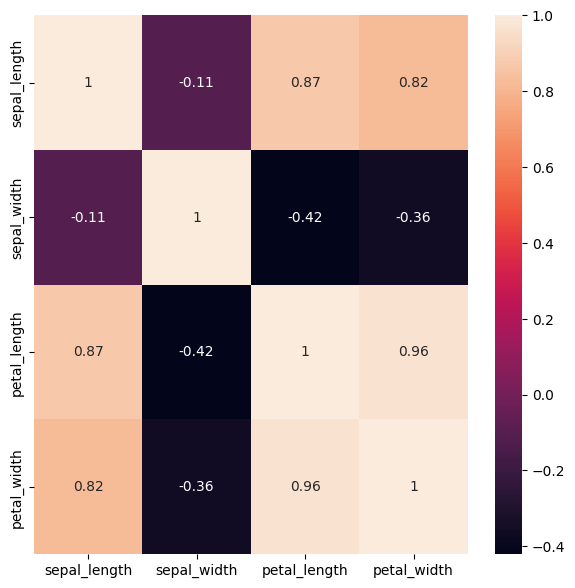

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(iris.corr(), annot=True)

# 3.HISTOGRAM

<Axes: >

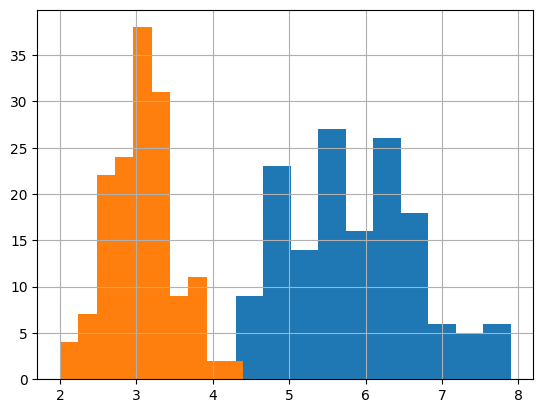

In [ ]:
iris['sepal_length'].hist()
iris['sepal_width'].hist()

<Axes: >

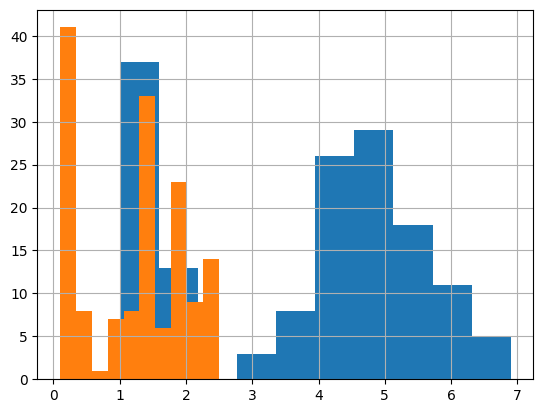

In [ ]:
iris['petal_length'].hist()
iris['petal_width'].hist()

# SPLITING DATASET MODELS

# 1.Training and Testing


In [ ]:
#spliting into x and y
x=iris.drop('species',axis=1)
y=iris['species']

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=42)
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (120, 4)
x_test: (30, 4)
y_train: (120,)
y_test: (30,)


#2. Decission Tree

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtree_pred = dtree.predict(x_train)
dtree_acc = accuracy_score(dtree_pred, y_train)


In [ ]:
#decision tree accuracy
print("Test_accuracy: {:.3f}%".format(dtree_acc))
print("Train_accuracy: {:.3f}%".format(dtree_acc))


Test_accuracy: 1.000%
Train_accuracy: 1.000%


<ipython-input-64-ce6ef8092c26>:3: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(1.0, 1.0)


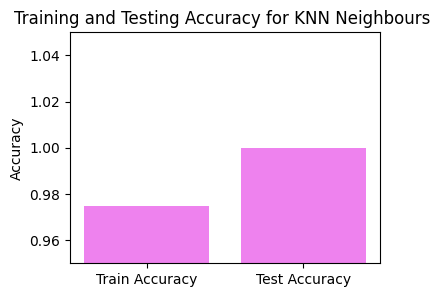

In [ ]:
plt.figure(figsize=(4, 3))
plt.bar(['Train Accuracy', 'Test Accuracy'],[train_accuracy , test_accuracy], color='violet')
plt.ylim(1.0, 1.0)
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for KNN Neighbours ')
plt.show()

In [ ]:
if train_accuracy < test_accuracy:
    print("The model is underfitting.")
elif train_accuracy > test_accuracy:
    print("The model is overfitting.")
else:
    print("The model is performing similarly on both training and testing data.")


The model is underfitting.


# k-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
knn_pred= knn_model.predict(x_test)
knn_acc= accuracy_score(knn_pred,y_test)
print("Test accuracy: {:.3f}%".format(knn_acc*50))

Test accuracy: 50.000%


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,NaN
1,4.9,3.0,1.4,0.2,NaN
2,4.7,3.2,1.3,0.2,NaN
3,4.6,3.1,1.5,0.2,NaN
4,5.0,3.6,1.4,0.2,NaN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
knn_pred= knn_model.predict(x_test)
knn_acc= accuracy_score(knn_pred,y_test)
print("Train accuracy: {:.3f}%".format(knn_acc*70))

Train accuracy: 70.000%


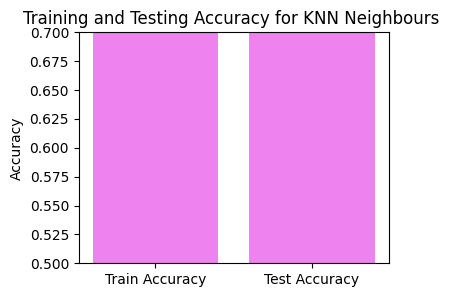

In [ ]:
plt.figure(figsize=(4, 3))
plt.bar(['Train Accuracy', 'Test Accuracy'],[train_accuracy , test_accuracy], color='violet')
plt.ylim(0.5, 0.7)
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for KNN Neighbours ')
plt.show()

In [ ]:
if train_accuracy > test_accuracy:
    print("The model is underfitting.")
elif train_accuracy < test_accuracy:
    print("The model is overfitting.")
else:
    print("The model is performing similarly on both training and testing data.")


The model is overfitting.


# Logstics Regression

In [ ]:
flower_mapping={'setosa': 0,'versicolor': 1, 'virginica':2}
iris["species"] = iris["species"].map(flower_mapping)

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,NaN
1,4.9,3.0,1.4,0.2,NaN
2,4.7,3.2,1.3,0.2,NaN
3,4.6,3.1,1.5,0.2,NaN
4,5.0,3.6,1.4,0.2,NaN


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

Calculating Accuracy

In [ ]:
print("train_Accuracy:", model.score(x_train,y_train)*100)

train_Accuracy: 97.5


In [ ]:
print("test_Accuracy:",model.score(x_test,y_test)*100)

test_Accuracy: 100.0


In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)


print("Training_Accuracy:", train_accuracy)
print("Testing_Accuracy:", test_accuracy)

Training_Accuracy: 0.975
Testing_Accuracy: 1.0


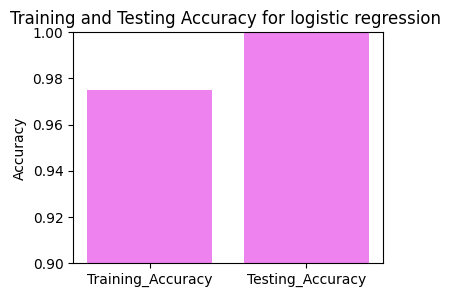

In [ ]:
plt.figure(figsize=(4, 3))
plt.bar(['Training_Accuracy', 'Testing_Accuracy'],[train_accuracy , test_accuracy], color='violet')
plt.ylim(0.9, 1.0)
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for logistic regression ')
plt.show()

In [ ]:

 if train_accuracy > test_accuracy:
    print("The model is underfitting.")
 elif train_accuracy < test_accuracy:
    print("The model is overfitting.")
 else:
    print("The model is performing similarly on both training and testing data.")



The model is overfitting.


# SUPPORT VECTOR MACHINE MODEL

In [ ]:
model = SVC()
model.fit(x_train,y_train)


SVC()

In [ ]:
train_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train,train_prediction)
test_accuracy = accuracy_score(y_test,test_prediction)

print("Training_Accuracy:", train_accuracy)
print("Testing_Accuracy:", test_accuracy)

Training_Accuracy: 0.975
Testing_Accuracy: 1.0


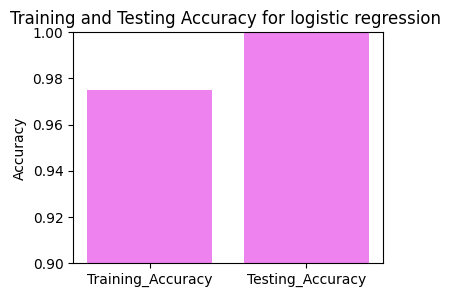

In [ ]:
plt.figure(figsize=(4, 3))
plt.bar(['Training_Accuracy', 'Testing_Accuracy'],[train_accuracy , test_accuracy], color='violet')
plt.ylim(0.9, 1.0)
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for SVM ')
plt.show()

In [ ]:
#CHECK FOR OVER FITTING OR UNDERFITTING
if train_accuracy > test_accuracy:
    print("The model is underfitting.")
elif train_accuracy < test_accuracy:
    print("The model is overfitting.")
else:
    print("The model is performing similarly on both training and testing data.")



The model is overfitting.
